**Project1:Covid**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 28.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 261 kB 42.7 MB/s 
     |████████████████████████████████| 15.5 MB 33.3 MB/s 
     |████████████████████████████████| 113 kB 45.8 MB/s 
     |████████████████████████████████| 6.8 MB 16.0 MB/s 
     |████████████████████████████████| 167 kB 47.1 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 35.3 MB/s 
     |████████████████████████████████| 1.3 MB 36.3 MB/s 
     |████████████████████████████████| 10.1 MB 32.1 MB/s 
     |████████████████████████████████| 102 kB 11.3 MB/s 
     |████████████████████████████████| 675 kB 41.7 MB/s 
     |████████████████

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import pycaret
from pycaret.regression import *

**Import Data**

In [4]:
data=pd.read_csv('/content/drive/MyDrive/country_vaccinations.csv')

In [5]:
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [6]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [7]:
data.nunique()

country                                  218
iso_code                                 218
date                                     226
total_vaccinations                     16997
people_vaccinated                      15954
people_fully_vaccinated                13072
daily_vaccinations_raw                 12463
daily_vaccinations                     17641
total_vaccinations_per_hundred          6967
people_vaccinated_per_hundred           5431
people_fully_vaccinated_per_hundred     3943
daily_vaccinations_per_million          9400
vaccines                                  53
source_name                               92
source_website                           148
dtype: int64

In [8]:
data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [9]:
data = data.drop('iso_code' , axis=1)

In [10]:
data = data.drop('date' , axis=1)

In [11]:
data = data.drop('source_name' , axis=1)

In [12]:
data = data.drop('source_website' , axis=1)

In [13]:
data_fillna = data.copy()

In [14]:
data_fillna.fillna(data_fillna.mean(), inplace=True)

In [15]:
data1=pd.get_dummies(data_fillna,columns=["country"])

In [16]:
cols=list(data1.columns.values)
cols.pop(cols.index('total_vaccinations'))
data1=data1[cols+['total_vaccinations']]

In [17]:
data1.head()

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire Sint Eustatius and Saba,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Cote d'Ivoire,country_Croatia,country_Cuba,country_Curacao,country_Cyprus,country_Czechia,country_Democratic Republic of Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_England,country_Equatorial Guinea,country_Estonia,country_Eswatini,country_Ethiopia,country_Faeroe Islands,country_Falkland Islands,country_Fiji,country_Finland,country_France,country_French Polynesia,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Mauritania,country_Mauritius,country_Mexico,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_North Macedonia,country_Northern Cyprus,country_Northern Ireland,country_Norway,country_Oman,country_Pakistan,country_Palestine,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Pitcairn,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russia,country_Rwanda,country_Saint Helena,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Scotland,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten (Dutch part),country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Thailand,country_Timor,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks and Caicos Islands,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Va

In [18]:
print(data1.isnull().sum())
data1

people_vaccinated                           0
people_fully_vaccinated                     0
daily_vaccinations_raw                      0
daily_vaccinations                          0
total_vaccinations_per_hundred              0
people_vaccinated_per_hundred               0
people_fully_vaccinated_per_hundred         0
daily_vaccinations_per_million              0
vaccines                                    0
country_Afghanistan                         0
country_Albania                             0
country_Algeria                             0
country_Andorra                             0
country_Angola                              0
country_Anguilla                            0
country_Antigua and Barbuda                 0
country_Argentina                           0
country_Armenia                             0
country_Aruba                               0
country_Australia                           0
country_Austria                             0
country_Azerbaijan                

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire Sint Eustatius and Saba,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Cote d'Ivoire,country_Croatia,country_Cuba,country_Curacao,country_Cyprus,country_Czechia,country_Democratic Republic of Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_England,country_Equatorial Guinea,country_Estonia,country_Eswatini,country_Ethiopia,country_Faeroe Islands,country_Falkland Islands,country_Fiji,country_Finland,country_France,country_French Polynesia,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Mauritania,country_Mauritius,country_Mexico,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_North Macedonia,country_Northern Cyprus,country_Northern Ireland,country_Norway,country_Oman,country_Pakistan,country_Palestine,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Pitcairn,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russia,country_Rwanda,country_Saint Helena,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Scotland,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten (Dutch part),country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Thailand,country_Timor,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks and Caicos Islands,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Va

In [ ]:
list_of_Vaccines = []
for sublist in list(data1.vaccines.map(lambda i : i.split(','))):
    for i in sublist:
        i = i.strip()   # remove leading and trailing whitespaces
        if i not in list_of_Vaccines:
            list_of_Vaccines.append(i)
print(list_of_Vaccines)           

['Johnson&Johnson', 'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinopharm/Beijing', 'Sinovac', 'Sputnik V', 'Moderna', 'Covaxin', 'CanSino', 'Sinopharm/Wuhan', 'Abdala', 'Soberana02', 'QazVac', 'Sinopharm/HayatVax', 'EpiVacCorona', 'RBD-Dimer']


In [ ]:
countries_use_Johnson = data[data.vaccines.str.contains('Johnson&Johnson')].sort_values(by="total_vaccinations", ascending= False)['country'].unique()
print(countries_use_Johnson)

['United States' 'Brazil' 'Germany' 'France' 'Italy' 'Spain' 'Poland'
 'South Korea' 'Netherlands' 'Belgium' 'Portugal' 'Hungary' 'Greece'
 'Czechia' 'Romania' 'Austria' 'South Africa' 'Ireland' 'Denmark'
 'Lithuania' 'Bulgaria' 'Latvia' 'Honduras' 'Estonia' 'Afghanistan'
 'Cyprus' 'Malta' 'Iceland' 'Libya']


In [ ]:
for i in range(16):
  j=list_of_Vaccines[i]
  countries_use_i=data[data.vaccines.str.contains(j)].sort_values(by="total_vaccinations", ascending= False)['country'].unique()
  print(len(countries_use_i))
  print(list_of_Vaccines[i])


29
Johnson&Johnson
180
Oxford/AstraZeneca
107
Pfizer/BioNTech
61
Sinopharm/Beijing
36
Sinovac
48
Sputnik V
56
Moderna
6
Covaxin
4
CanSino
2
Sinopharm/Wuhan
1
Abdala
1
Soberana02
1
QazVac
1
Sinopharm/HayatVax
2
EpiVacCorona
1
RBD-Dimer


In [ ]:
countries_use_Dimer = data[data.vaccines.str.contains('RBD-Dimer')].sort_values(by="total_vaccinations", ascending= False)['country'].unique()
print(countries_use_Dimer)

['Uzbekistan']


**EDA**

In [ ]:
data.groupby('country')[['daily_vaccinations_per_million','total_vaccinations']].sum()

,daily_vaccinations_per_million,total_vaccinations
country,,
Afghanistan,25140.0,1.271652e+07
Albania,358526.0,5.786876e+07
Algeria,55592.0,2.575030e+06
Andorra,851369.0,5.094600e+05
Angola,46917.0,1.641231e+07
Anguilla,1144239.0,1.573830e+05
Antigua and Barbuda,696994.0,1.597538e+06
Argentina,554458.0,1.436760e+09
Armenia,83227.0,8.196840e+05


In [ ]:
data.groupby('country')[['vaccines']].sum()

,vaccines
country,
Afghanistan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Albania,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
Algeria,"Oxford/AstraZeneca, Sputnik VOxford/AstraZenec..."
Andorra,"Oxford/AstraZeneca, Pfizer/BioNTechOxford/Astr..."
Angola,Oxford/AstraZenecaOxford/AstraZenecaOxford/Ast...
Anguilla,Oxford/AstraZenecaOxford/AstraZenecaOxford/Ast...
Antigua and Barbuda,Oxford/AstraZenecaOxford/AstraZenecaOxford/Ast...
Argentina,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik..."
Armenia,"Oxford/AstraZeneca, Sinovac, Sputnik VOxford/A..."


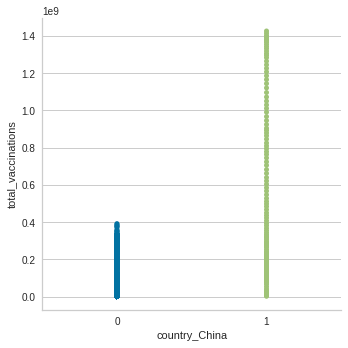

In [ ]:
sns.catplot(x="country_China", y="total_vaccinations", jitter=False, data=data1)

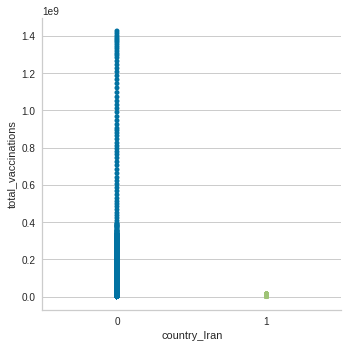

In [ ]:
sns.catplot(x="country_Iran", y="total_vaccinations", jitter=False, data=data1)

In [ ]:
corr = data.corr()

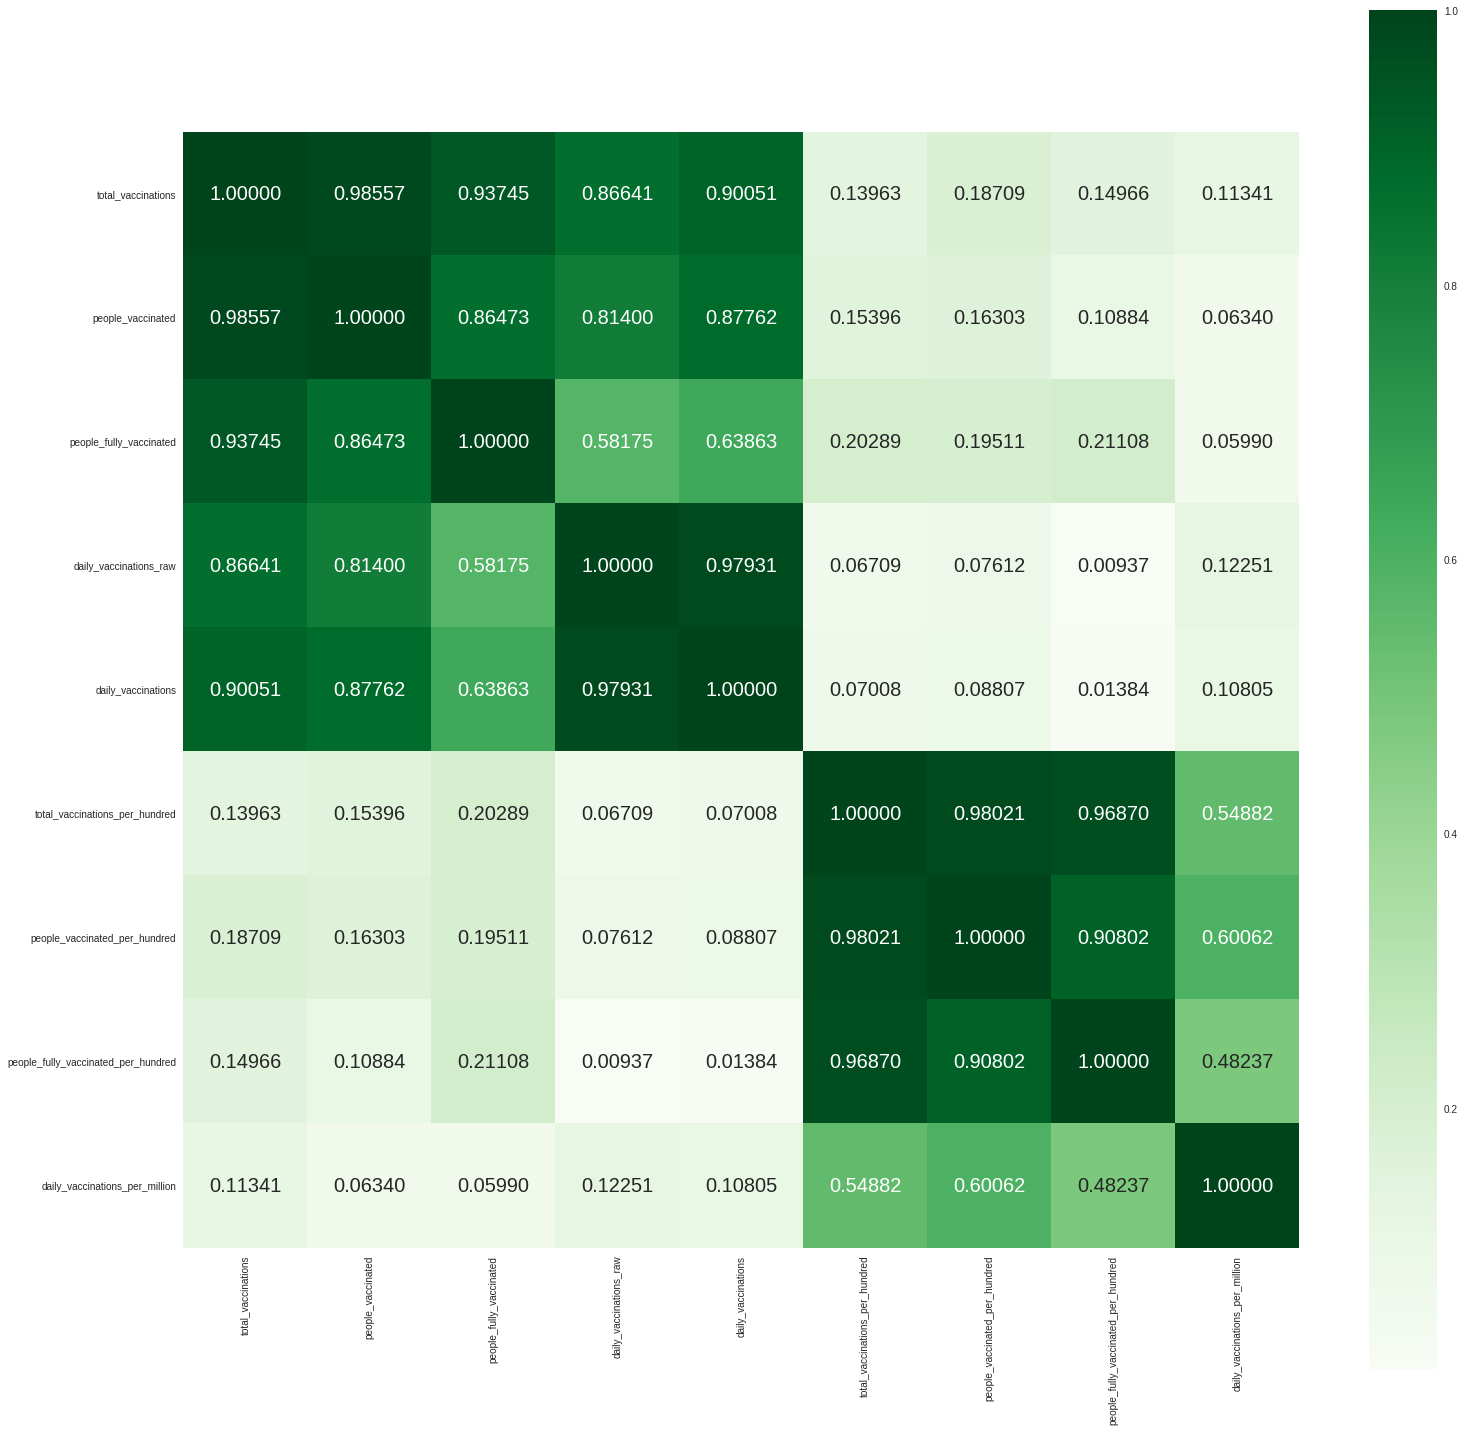

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.5f', annot=True, annot_kws={'size':20}, cmap='Greens')

In [ ]:
data1.dtypes

people_vaccinated                           float64
people_fully_vaccinated                     float64
daily_vaccinations_raw                      float64
daily_vaccinations                          float64
total_vaccinations_per_hundred              float64
people_vaccinated_per_hundred               float64
people_fully_vaccinated_per_hundred         float64
daily_vaccinations_per_million              float64
vaccines                                     object
country_Afghanistan                           uint8
country_Albania                               uint8
country_Algeria                               uint8
country_Andorra                               uint8
country_Angola                                uint8
country_Anguilla                              uint8
country_Antigua and Barbuda                   uint8
country_Argentina                             uint8
country_Armenia                               uint8
country_Aruba                                 uint8
country_Aust

In [ ]:
data1.columns

Index(['people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'country_Afghanistan',
       ...
       'country_Uzbekistan', 'country_Vanuatu', 'country_Venezuela',
       'country_Vietnam', 'country_Wales', 'country_Wallis and Futuna',
       'country_Yemen', 'country_Zambia', 'country_Zimbabwe',
       'total_vaccinations'],
      dtype='object', length=228)

*   Splitting data into train and test
*   Scaling features 

In [19]:
x= data1.loc[: , ['daily_vaccinations','daily_vaccinations_raw','people_fully_vaccinated','country_China','total_vaccinations_per_hundred','people_vaccinated']].values
y= data1.iloc[: ,[-1]].values
print(x.shape , y.shape)

(31240, 6) (31240, 1)


In [20]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(23430, 6) (23430, 1)
(7810, 6) (7810, 1)


In [21]:
sc = StandardScaler()
x_train[: , :-1] = sc.fit_transform(x_train[: , :-1])
x_test[: , :-1] = sc.transform(x_test[: , :-1])

**LinearRegression**

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
# regressor.fit(x_test1, y_test1)
predictions=regressor.predict(x_train)
y_pred=regressor.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(predictions,y_train)) 
print('Mean Squared Error:', metrics.mean_squared_error(predictions,y_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions,y_train)))
print('R^2 squared error:' ,metrics.r2_score(predictions,y_train))

Mean Absolute Error: 6114632.9357492365
Mean Squared Error: 419532427708638.0
Root Mean Squared Error: 20482490.75939345
R^2 squared error: 0.8277134464755611


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 squared error:' ,metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 5776428.906052104
Mean Squared Error: 149974942313451.53
Root Mean Squared Error: 12246425.69542034
R^2 squared error: 0.8784535158752133


In [ ]:
regressor.coef_

array([[ 4.80183568e+07, -2.46238084e+06,  1.27645219e+07,
         2.47853670e+05,  1.98742326e+06, -1.29740882e-01]])

In [ ]:
regressor.intercept_

array([13023259.48251505])

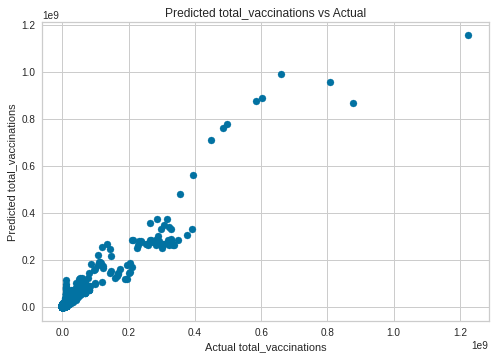

In [ ]:
plt.scatter(y_test , y_pred)
plt.title('Predicted total_vaccinations vs Actual')
plt.xlabel('Actual total_vaccinations')
plt.ylabel('Predicted total_vaccinations')
plt.show() 

**KNN Regression**

In [ ]:
knn_reg = KNeighborsRegressor()
parameters = [{'n_neighbors' : [1,3,5,7,9,11,13,15,17]}]
grid_search = GridSearchCV(estimator=knn_reg , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Scores : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Scores : 0.9633082904067436
Best Parameter : {'n_neighbors': 1}


In [ ]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train , y_train)
knn.fit(x_test,y_test)
predictions=knn.predict(x_train)
y_pred = knn.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R^2 squared error:' ,metrics.r2_score(y_train, predictions))

Mean Absolute Error: 1608714.8707087508
Mean Squared Error: 578682308109436.2
Root Mean Squared Error: 24055816.51304807
R^2 squared error: 0.7972820201847973


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_pred, y_test)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R^2 squared error:' ,metrics.r2_score(y_pred, y_test))

Mean Absolute Error: 0.0012804097311139564
Mean Squared Error: 0.002560819462227913
Root Mean Squared Error: 0.05060453993692575
R^2 squared error: 1.0


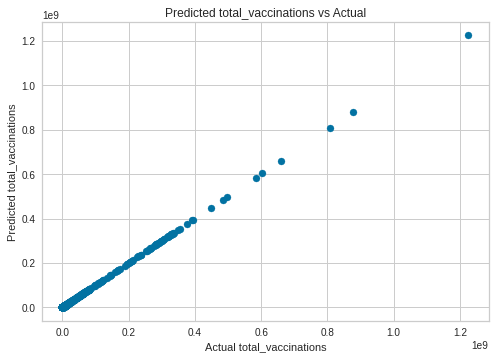

In [ ]:
plt.scatter(y_test , y_pred)
plt.title('Predicted total_vaccinations vs Actual')
plt.xlabel('Actual total_vaccinations')
plt.ylabel('Predicted total_vaccinations')
plt.show() 

**Decision Tree Regression**

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(x_train , y_train)
predictions=dt_regressor.predict(x_train)
y_pred = dt_regressor.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R^2 squared error:' ,metrics.r2_score(y_train, predictions))

Mean Absolute Error: 0.05099759743867548
Mean Squared Error: 17.78394000365945
Root Mean Squared Error: 4.217100900341306
R^2 squared error: 0.9999999999999938


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_pred, y_test)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R^2 squared error:' ,metrics.r2_score(y_pred, y_test))

Mean Absolute Error: 169535.6038647195
Mean Squared Error: 2417444073876.2036
Root Mean Squared Error: 1554813.1958136333
R^2 squared error: 0.9980198816259555


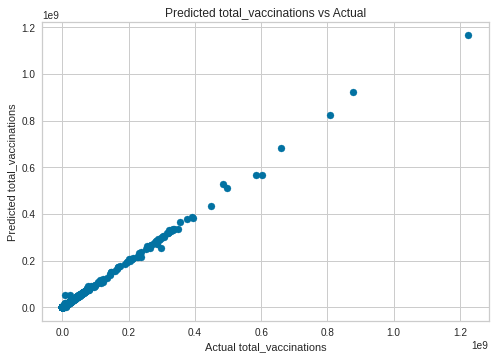

In [ ]:
plt.scatter(y_test , y_pred)
plt.title('Predicted total_vaccinations vs Actual')
plt.xlabel('Actual total_vaccinations')
plt.ylabel('Predicted total_vaccinations')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dt_regressor, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.29 %
Standard Deviation: 4.66 %


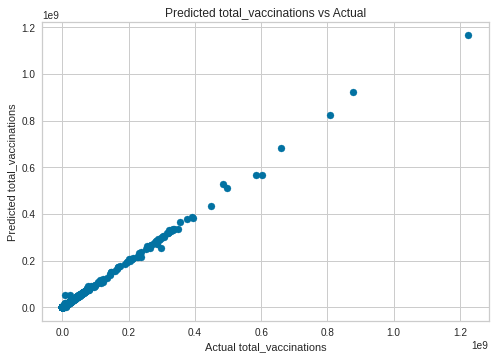

In [ ]:
plt.scatter(y_test , y_pred)
plt.title('Predicted total_vaccinations vs Actual')
plt.xlabel('Actual total_vaccinations')
plt.ylabel('Predicted total_vaccinations')
plt.show()

**Random Forest Regression**

In [ ]:
rf_reg = RandomForestRegressor()

parameters = [{'n_estimators' : [100,200,300]}]
grid_search = GridSearchCV(estimator=rf_reg , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Score : 0.9914767355699181
Best Parameter : {'n_estimators': 100}


In [ ]:
rf_reg.fit(x_train , y_train)
y_pred = rf_reg.predict(x_test)
predictions= rf_reg.predict(x_train)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R^2 squared error:' ,metrics.r2_score(y_train, predictions))

Mean Absolute Error: 66151.60552200813
Mean Squared Error: 4644107054546.46
Root Mean Squared Error: 2155019.0380937383
R^2 squared error: 0.998373124619588


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_pred, y_test)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R^2 squared error:' ,metrics.r2_score(y_pred, y_test))

Mean Absolute Error: 101588.09296281282
Mean Squared Error: 550617921287.9541
Root Mean Squared Error: 742036.3342100938
R^2 squared error: 0.9995515034022653


In [ ]:
accuracies = cross_val_score(estimator = rf_reg, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.22 %
Standard Deviation: 1.84 %


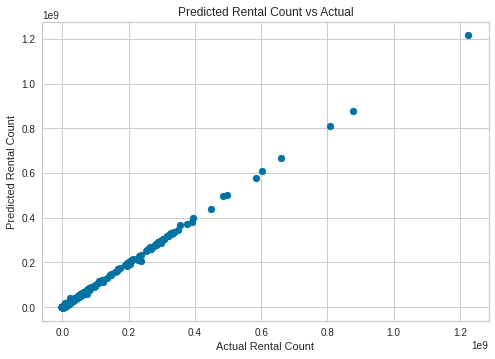

In [ ]:
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

**XGBoost Regression**

In [ ]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
parameters = [{'n_estimators' : [50,100,200] , 'learning_rate' : [0.06,0.08,.09] , 'gamma': [0.0,0.1, 0.2,] , 'max_depth':[6,7,8]}]
grid_search = GridSearchCV(estimator=reg_mod , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

[08:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score : 0.9956850252141894
Best Parameter : {'gamma': 0.0, 'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
xgb_reg = xgb.XGBRegressor(
    n_estimators = 200,
    learning_rate = 0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
xgb_reg.fit(x_train , y_train)
y_pred = xgb_reg.predict(x_test)
predictions= xgb_reg.predict(x_train)

[08:13:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R^2 squared error:' ,metrics.r2_score(y_train, predictions))

Mean Absolute Error: 102055.59697540471
Mean Squared Error: 91408556393.33813
Root Mean Squared Error: 302338.4798422757
R^2 squared error: 0.9999679787032881


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_pred, y_test)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R^2 squared error:' ,metrics.r2_score(y_pred, y_test))

Mean Absolute Error: 198429.3874240863
Mean Squared Error: 1516867003412.7979
Root Mean Squared Error: 1231611.5472878604
R^2 squared error: 0.9987733244448465


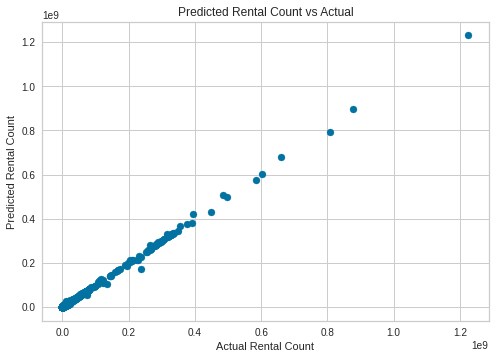

In [ ]:
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

**Support Vector Regression**

In [ ]:
svr_reg = SVR()
parameters = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}]
grid_search = GridSearchCV(estimator=svr_reg , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

In [ ]:
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train,y_train)
y_pred=svr_reg.predict(x_test)
predictions=svr_reg.predict(x_train)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R^2 squared error:' ,metrics.r2_score(y_train, predictions))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_pred, y_test)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R^2 squared error:' ,metrics.r2_score(y_pred, y_test))

In [ ]:
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

**Pycaret**

In [22]:
setup(data = data,target = 'total_vaccinations',session_id = 123)

,Description,Value
0,session_id,123
1,Target,total_vaccinations
2,Original Data,"(31240, 11)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12227, 249)"


({'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_param',
  'transform_target_param',
  'y',
  'y_test',
  'y_train'},
 -1,
 4931     35135820.0
 8741        21799.0
 15970       16000.0
 17321      282926.0
 4819      2329622.0
             ...    
 12412    

In [23]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.112968e+05,1.412437e+12,1.092319e+06,0.9996,0.3312,2.7276,15.986
gbr,Gradient Boosting Regressor,8.932235e+05,1.940522e+13,3.645133e+06,0.9961,1.7653,164.7409,4.294
rf,Random Forest Regressor,3.135509e+05,5.446928e+13,4.437157e+06,0.9918,0.2381,2.0363,15.053
dt,Decision Tree Regressor,3.865103e+05,9.511254e+13,4.972967e+06,0.9872,0.1832,0.1077,0.258
lightgbm,Light Gradient Boosting Machine,7.757175e+05,5.021249e+13,6.751224e+06,0.9869,1.1144,14.4204,0.287
ada,AdaBoost Regressor,7.707417e+06,2.115103e+14,1.255070e+07,0.9532,3.6560,2926.9745,2.803
knn,K Neighbors Regressor,1.322726e+06,3.894227e+14,1.827727e+07,0.9056,0.4382,3.6343,0.455
ridge,Ridge Regression,4.477176e+06,4.786182e+14,2.033814e+07,0.8801,2.8565,1483.0825,0.057
llar,Lasso Least Angle Regression,4.521290e+06,4.788599e+14,2.035436e+07,0.8799,2.8661,1488.7333,0.448
lasso,Lasso Regression,4.523045e+06,4.788891e+14,2.035503e+07,0.8799,2.8678,1494.7595,1.815


In [24]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,144351.2464,1.593515e+12,1.262345e+06,0.9998,0.4071,4.2555
1,72960.0089,3.227253e+11,5.680891e+05,0.9997,0.4373,0.1727
2,69806.3769,2.820765e+11,5.311087e+05,0.9999,0.1711,0.0542
3,186363.0298,5.115631e+12,2.261776e+06,0.9986,0.2993,0.0581
4,108993.8307,8.328581e+11,9.126106e+05,0.9998,0.5947,20.5579
5,133353.6915,1.372531e+12,1.171551e+06,0.9997,0.2071,0.0799
6,123887.0050,1.663227e+12,1.289661e+06,0.9997,0.2179,0.0556
7,85710.5278,7.196750e+11,8.483366e+05,0.9998,0.3991,0.0713
8,106500.1101,1.481829e+12,1.217304e+06,0.9997,0.2258,0.5946
9,81042.0455,7.403018e+11,8.604079e+05,0.9998,0.3530,1.3761


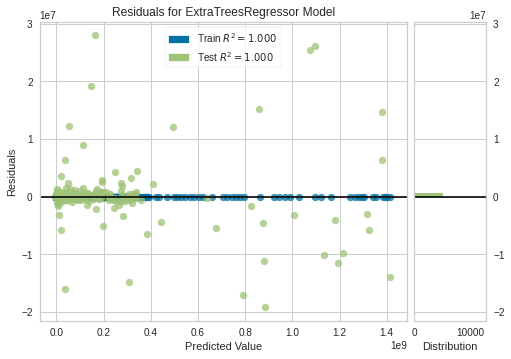

In [25]:
plot_model(et)

In [26]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,106301.2323,1.072359e+12,1.035548e+06,0.9998,0.1677,0.0799


,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire Sint Eustatius and Saba,country_Bosnia and Herzegovina,country_Botswana,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Cambodia,...,vaccines_CanSino Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Covaxin Oxford/AstraZeneca,vaccines_Covaxin Oxford/AstraZeneca Sinopharm/Beijing,vaccines_Covaxin Oxford/AstraZeneca Sinopharm/Beijing Sinovac Sputnik V,vaccines_Covaxin Oxford/AstraZeneca Sinopharm/Beijing Sputnik V,vaccines_Covaxin Oxford/AstraZeneca Sputnik V,vaccines_EpiVacCorona Sputnik V,vaccines_Johnson&Johnson Moderna Oxford/AstraZeneca Pfizer/BioNTech,vaccines_Johnson&Johnson Moderna Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing Sputnik V,vaccines_Johnson&Johnson Moderna Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Johnson&Johnson Moderna Pfizer/BioNTech,vaccines_Johnson&Johnson Oxford/AstraZeneca Pfizer/BioNTech Sinovac,vaccines_Johnson&Johnson Pfizer/BioNTech,vaccines_Moderna,vaccines_Moderna Oxford/AstraZeneca,vaccines_Moderna Oxford/AstraZeneca Pfizer/BioNTech,vaccines_Moderna Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Moderna Pfizer/BioNTech,vaccines_Moderna Pfizer/BioNTech Sinovac,vaccines_Oxford/AstraZeneca,vaccines_Oxford/AstraZeneca Pfizer/BioNTech,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing Sinovac,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing Sputnik V,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinovac,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Oxford/AstraZeneca Sinopharm/Beijing,vaccines_Oxford/AstraZeneca Sinopharm/Beijing Sinovac,vaccines_Oxford/AstraZeneca Sinopharm/Beijing Sinovac Sputnik V,vaccines_Oxford/AstraZeneca Sinopharm/Beijing Sputnik V,vaccines_Oxford/AstraZeneca Sinovac,vaccines_Oxford/AstraZeneca Sinovac Sputnik V,vaccines_Oxford/AstraZeneca Sputnik V,vaccines_Pfizer/BioNTech,vaccines_Pfizer/BioNTech Sinovac,vaccines_QazVac Sinopharm/HayatVax Sputnik V,vaccines_Sinopharm/Beijing,vaccines_Sinopharm/Beijing Sputnik V,total_vaccinations,Label
0,25483314.0,9652507.0,440846.000000,471349.0,93.089996,67.519997,25.570000,12489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35135820.0,35108461.34
1,20323.0,1476.0,1483.000000,1008.0,1.640000,1.530000,0.110000,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21799.0,21694.31
2,16000.0,3238067.0,223317.203125,410.0,0.750000,0.750000,12.099512,191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16000.0,16300.33
3,267795.0,15131.0,2740.000000,5971.0,52.340000,49.540001,2.800000,11046.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [28]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


**Second best model**

In [29]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.227090e+06,1.090098e+14,1.044078e+07,0.9863,1.8583,176.5979
1,6.950747e+05,3.201230e+12,1.789198e+06,0.9967,1.7206,34.0997
2,7.724334e+05,4.911590e+12,2.216211e+06,0.9984,1.7698,101.9254
3,7.984006e+05,8.771784e+12,2.961720e+06,0.9975,1.9144,21.6513
4,8.469966e+05,5.018911e+12,2.240293e+06,0.9985,1.7329,26.4733
5,1.009460e+06,1.562920e+13,3.953378e+06,0.9961,1.8027,57.0270
6,7.528568e+05,3.661896e+12,1.913608e+06,0.9993,1.6206,9.3809
7,9.028455e+05,1.263036e+13,3.553922e+06,0.9958,1.8498,983.8552
8,1.135729e+06,2.600789e+13,5.099793e+06,0.9939,1.4485,78.1808
9,7.913486e+05,5.209486e+12,2.282430e+06,0.9984,1.9359,158.2174


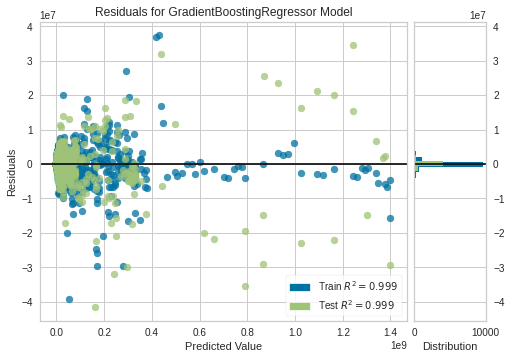

In [30]:
plot_model(gbr)

In [31]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,793621.461,5.448100e+12,2334116.489,0.999,1.7777,534.5716


,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire Sint Eustatius and Saba,country_Bosnia and Herzegovina,country_Botswana,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Cambodia,...,vaccines_CanSino Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Covaxin Oxford/AstraZeneca,vaccines_Covaxin Oxford/AstraZeneca Sinopharm/Beijing,vaccines_Covaxin Oxford/AstraZeneca Sinopharm/Beijing Sinovac Sputnik V,vaccines_Covaxin Oxford/AstraZeneca Sinopharm/Beijing Sputnik V,vaccines_Covaxin Oxford/AstraZeneca Sputnik V,vaccines_EpiVacCorona Sputnik V,vaccines_Johnson&Johnson Moderna Oxford/AstraZeneca Pfizer/BioNTech,vaccines_Johnson&Johnson Moderna Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing Sputnik V,vaccines_Johnson&Johnson Moderna Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Johnson&Johnson Moderna Pfizer/BioNTech,vaccines_Johnson&Johnson Oxford/AstraZeneca Pfizer/BioNTech Sinovac,vaccines_Johnson&Johnson Pfizer/BioNTech,vaccines_Moderna,vaccines_Moderna Oxford/AstraZeneca,vaccines_Moderna Oxford/AstraZeneca Pfizer/BioNTech,vaccines_Moderna Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Moderna Pfizer/BioNTech,vaccines_Moderna Pfizer/BioNTech Sinovac,vaccines_Oxford/AstraZeneca,vaccines_Oxford/AstraZeneca Pfizer/BioNTech,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing Sinovac,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinopharm/Beijing Sputnik V,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinovac,vaccines_Oxford/AstraZeneca Pfizer/BioNTech Sinovac Sputnik V,vaccines_Oxford/AstraZeneca Sinopharm/Beijing,vaccines_Oxford/AstraZeneca Sinopharm/Beijing Sinovac,vaccines_Oxford/AstraZeneca Sinopharm/Beijing Sinovac Sputnik V,vaccines_Oxford/AstraZeneca Sinopharm/Beijing Sputnik V,vaccines_Oxford/AstraZeneca Sinovac,vaccines_Oxford/AstraZeneca Sinovac Sputnik V,vaccines_Oxford/AstraZeneca Sputnik V,vaccines_Pfizer/BioNTech,vaccines_Pfizer/BioNTech Sinovac,vaccines_QazVac Sinopharm/HayatVax Sputnik V,vaccines_Sinopharm/Beijing,vaccines_Sinopharm/Beijing Sputnik V,total_vaccinations,Label
0,25483314.0,9652507.0,440846.000000,471349.0,93.089996,67.519997,25.570000,12489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35135820.0,3.720063e+07
1,20323.0,1476.0,1483.000000,1008.0,1.640000,1.530000,0.110000,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21799.0,9.553452e+04
2,16000.0,3238067.0,223317.203125,410.0,0.750000,0.750000,12.099512,191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16000.0,9.553452e+04
3,267795.0,15131.0,2740.000000,5971.0,52.340000,49.540001,2.800000,11046.0,0.0,0.0,0.0,0.0,